In [ ]:
#Importing the Libraries
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
all_data = pd.read_csv("HDFCBANK.csv")
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11
1,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12
2,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12
3,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12
4,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12


In [ ]:
Close_list = all_data['Close'].tolist()
total=len(Close_list);

In [ ]:
j=0
j=0
D1=[]
D2=[]
D3=[]
D4=[]
D5=[]
D6=[]
D7=[]
D8=[]
D9=[]
D10=[]
D11=[]
D12=[]
D13=[]
D14=[]
D15=[]
D16=[]
DIFF=[]
PERCDIFF=[]
TARGET=[]
for i in range(0,total):
  D1.append(Close_list[j])
  D2.append(Close_list[j+1])
  D3.append(Close_list[j+2])
  D4.append(Close_list[j+3])
  D5.append(Close_list[j+4])
  D6.append(Close_list[j+5])
  D7.append(Close_list[j+6])
  D8.append(Close_list[j+7])
  D9.append(Close_list[j+8])
  D10.append(Close_list[j+9])
  D11.append(Close_list[j+10])
  D12.append(Close_list[j+11])
  D13.append(Close_list[j+12])
  D14.append(Close_list[j+13])
  D15.append(Close_list[j+14])
  D16.append(Close_list[j+15])
  diff=Close_list[j+15]-Close_list[j+14]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[j+15]
  PERCDIFF.append(percdiff)
  if(percdiff>0.7):
    TARGET.append('pos')
  elif(percdiff<-0.7):
    TARGET.append('neg')
  else:
    TARGET.append('neu')
  j=j+1;
  if(j==total-15):
    break

In [ ]:
df1=pd.DataFrame(D1)
df2=pd.DataFrame(D2)
df3=pd.DataFrame(D3)
df4=pd.DataFrame(D4)
df5=pd.DataFrame(D5)
df6=pd.DataFrame(D6)
df7=pd.DataFrame(D7)
df8=pd.DataFrame(D8)
df9=pd.DataFrame(D9)
df10=pd.DataFrame(D10)
df11=pd.DataFrame(D11)
df12=pd.DataFrame(D12)
df13=pd.DataFrame(D13)
df14=pd.DataFrame(D14)
df15=pd.DataFrame(D15)
df16=pd.DataFrame(D16)
df17=pd.DataFrame(DIFF)
df18=pd.DataFrame(PERCDIFF)
df19=pd.DataFrame(TARGET)
df=pd.DataFrame()
df['Close']=all_data['Close']
df['D1']=df1
df['D2']=df2
df['D3']=df3
df['D4']=df4
df['D5']=df5
df['D6']=df6
df['D7']=df7
df['D8']=df8
df['D9']=df9
df['D10']=df10
df['D11']=df11
df['D12']=df12
df['D13']=df13
df['D14']=df14
df['D15']=df15
df['D16']=df16
df['DIFF']=df17
df['PERCDIFF']=df18
df['TARGET']=df19
df.dropna(inplace=True)
df.head(10)

,Close,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,DIFF,PERCDIFF,TARGET
0,293.50,293.50,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,-6.50,-2.218052,neg
1,304.05,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,10.10,3.331684,pos
2,292.80,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,13.45,4.248263,pos
3,296.45,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,324.40,7.80,2.404439,pos
4,286.55,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,324.40,333.50,9.10,2.728636,pos
5,287.20,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,324.40,333.50,350.55,17.05,4.863785,pos
6,283.85,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,324.40,333.50,350.55,351.40,0.85,0.241890,neu
7,285.60,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,324.40,333.50,350.55,351.40,341.90,-9.50,-2.778590,neg
8,283.85,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,324.40,333.50,350.55,351.40,341.90,357.20,15.30,4.283315,pos
9,286.55,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,324.40,333.50,350.55,351.40,341.90,357.20,355.45,-1.75,-0.492334,neu


In [ ]:
features = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14']
df1=df[features]
df1['TARGET']=df['TARGET']
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,TARGET
0,293.50,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,neg
1,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,pos
2,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,pos
3,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,pos
4,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,pos


In [ ]:
df0=pd.DataFrame()
df0['TARGET']= np.where(df1['TARGET']=='pos','1',(np.where(df['TARGET']=='neg','-1','0')))

df0.head()
df0.groupby('TARGET').size()

,TARGET
0,-1
1,1
2,1
3,1
4,1


TARGET
-1    1789
0     1882
1     1891
dtype: int64

#Explore the class distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'TARGET')

Text(0.5, 1.0, 'Number of positive negative and neutral messages')

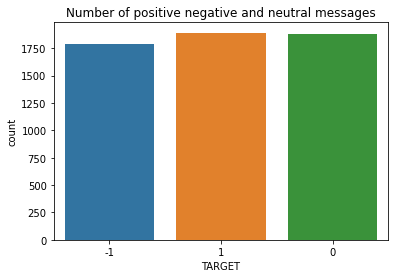

In [ ]:
sns.countplot(df0['TARGET'])
plt.xlabel('TARGET')
plt.title('Number of positive negative and neutral messages')

In [ ]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df1.columns:
  if df1[col].dtype=='object':
    df1[col]=pd.Categorical(df1[col]).codes
df1.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,TARGET
0,293.50,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,0
1,304.05,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,2
2,292.80,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,2
3,296.45,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,2
4,286.55,287.20,283.85,285.60,283.85,286.55,302.20,305.75,305.25,291.35,299.55,293.05,303.15,316.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,501.90,486.40,473.00,483.30,541.30,543.65,478.45,496.35,525.35,544.70,530.70,513.20,515.25,509.35,0
96,486.40,473.00,483.30,541.30,543.65,478.45,496.35,525.35,544.70,530.70,513.20,515.25,509.35,503.60,0
97,473.00,483.30,541.30,543.65,478.45,496.35,525.35,544.70,530.70,513.20,515.25,509.35,503.60,495.35,1
98,483.30,541.30,543.65,478.45,496.35,525.35,544.70,530.70,513.20,515.25,509.35,503.60,495.35,488.20,2


In [ ]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df1[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform)
feature_transform.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
0,0.003332,0.006974,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000000,0.003756,0.004985,0.004812,0.000000
1,0.006974,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.005408,0.004985,0.004812,0.000000,0.002839
2,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.006336,0.006635,0.004812,0.000000,0.002839,0.000588
3,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.006336,0.007561,0.006463,0.000000,0.002839,0.000588,0.004085
4,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.006336,0.007561,0.007389,0.001659,0.002839,0.000588,0.004085,0.008741


In [ ]:
x=feature_transform
x.head()
y=df1['TARGET']
y.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14
0,0.003332,0.006974,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000000,0.003756,0.004985,0.004812,0.000000
1,0.006974,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.005408,0.004985,0.004812,0.000000,0.002839
2,0.003090,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.006336,0.006635,0.004812,0.000000,0.002839,0.000588
3,0.004350,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.006336,0.007561,0.006463,0.000000,0.002839,0.000588,0.004085
4,0.000932,0.001157,0.000000,0.000604,0.000000,0.000932,0.006336,0.007561,0.007389,0.001659,0.002839,0.000588,0.004085,0.008741


0    0
1    2
2    2
3    2
4    2
Name: TARGET, dtype: int8

In [ ]:
#create test and train data 70% and 30% split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
train_x.shape
test_x.shape
train_x.shape
train_y.shape

(3893, 14)

(1669, 14)

(3893, 14)

(3893,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

#CREATE DECISION TREE CLASSIFIER OBJECT
decisiontree1=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=4,class_weight=None)
#TRAIN MODEL
model=decisiontree1.fit(train_x,train_y)
model
classes=decisiontree1.predict(test_x)

DecisionTreeClassifier(max_depth=4, random_state=0)

# **ACCURACY SCORE-Decision Tree Classifier**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.32893948472139006


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.25      0.01      0.01       536
           1       0.33      0.99      0.49       543
           2       0.58      0.01      0.02       590

    accuracy                           0.33      1669
   macro avg       0.39      0.34      0.18      1669
weighted avg       0.39      0.33      0.17      1669



CONFUSION MATRIX


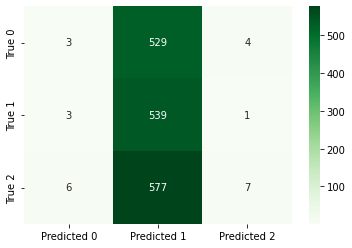

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 10),
              "min_samples_leaf": randint(1, 10),
              "criterion": ["gini", "entropy"]}

In [ ]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(decisiontree1, param_dist, cv=5)

In [ ]:
# Fit it to the data
tree_cv.fit(train_x,train_y)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
classes=tree_cv.predict(test_x)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff30fe948d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff3101014d0>})

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3}
Best score is 0.3526810788335187


# **ACCURACY SCORE-Decision Tree Classifier using RandomizedSearchCV**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.3421210305572199


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.31      0.31      0.31       536
           1       0.35      0.38      0.36       543
           2       0.37      0.33      0.35       590

    accuracy                           0.34      1669
   macro avg       0.34      0.34      0.34      1669
weighted avg       0.34      0.34      0.34      1669



CONFUSION MATRIX


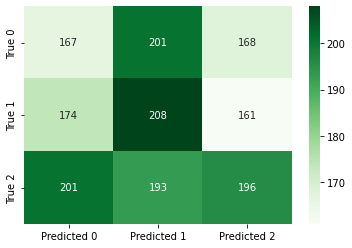

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
my_max_depth=[20,30,40,50,None]
my_criterion=['gini','entropy']
my_min_samples_split=[2,100,20,50,100]
#BUILDING THE MODEL
mytreeone=DecisionTreeClassifier()
#CROSS VALIDATION TELLS HOW A MODEL PERFORMS ON A DATASET USING MULTIPLE SAMPLES OF TRAIN DATA
grid=GridSearchCV(estimator=mytreeone,cv=3,param_grid=dict(max_depth=my_max_depth,criterion=my_criterion,min_samples_split=my_min_samples_split))
grid.fit(train_x,train_y)
classes=grid.predict(test_x)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40, 50, None],
                         'min_samples_split': [2, 100, 20, 50, 100]})

# **ACCURACY SCORE-Decision Tree Classifier using GridSearchCV**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.3702816057519473


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.33      0.15      0.21       536
           1       0.38      0.38      0.38       543
           2       0.38      0.56      0.45       590

    accuracy                           0.37      1669
   macro avg       0.36      0.36      0.35      1669
weighted avg       0.36      0.37      0.35      1669



CONFUSION MATRIX


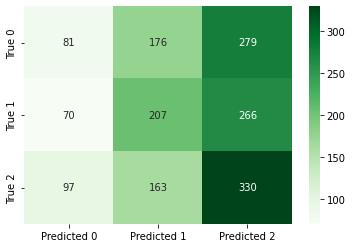

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
n_estimators=[10,500,100,2000]
criterion=['gini','entropy']
min_samples_split=[2,100,20,50,100]
max_depth=[20,30,40,50,None]

In [ ]:
param_grid={'n_estimators':n_estimators,'criterion':criterion,'min_samples_split':min_samples_split,'max_depth':max_depth}
rf=RandomForestClassifier()
rf_g=RandomizedSearchCV(rf,param_grid,cv=5,verbose=2,n_jobs=-1)
rf_g.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [20, 30, 40, 50, None],
                                        'min_samples_split': [2, 100, 20, 50,
                                                              100],
                                        'n_estimators': [10, 500, 100, 2000]},
                   verbose=2)

In [ ]:
#PREDICT USING THE TRAINED MODEL
classes=rf_g.predict(test_x)

# **ACCURACY SCORE-RandomForestClassifier using RandomizedSearchCV**

In [ ]:
#PRECISION AND RECALL
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y,classes))

ACCUIRACY SCORE
0.7962852007189934


In [ ]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y,classes))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       536
           1       0.79      0.81      0.80       543
           2       0.80      0.81      0.80       590

    accuracy                           0.80      1669
   macro avg       0.80      0.80      0.80      1669
weighted avg       0.80      0.80      0.80      1669



CONFUSION MATRIX


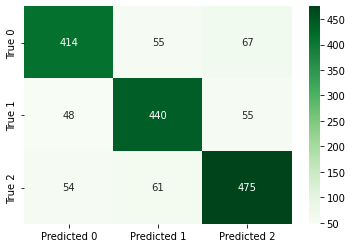

In [ ]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1","Predicted 2"]
lbl2=["True 0","True 1","True 2"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [2]:
!jupyter nbconvert HDFCpercdiff_0_7D1D14_SMP_DT_RF.ipynb

[NbConvertApp] Converting notebook HDFCpercdiff_0_7D1D14_SMP_DT_RF.ipynb to html
[NbConvertApp] Writing 444117 bytes to HDFCpercdiff_0_7D1D14_SMP_DT_RF.html
